In [2]:
#pip install -U scikit-learn
#pip install pandas
#pip install seaborn

In [3]:
#importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [4]:
renfe = pd.read_csv("./data/renfe.csv")

### Reading file:

In [5]:
renfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383568 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   FECHA_CONSULTA  383568 non-null  object 
 1   FECHA_INICIO    383568 non-null  object 
 2   FECHA_FIN       383568 non-null  object 
 3   CIUDAD_ORIGEN   383568 non-null  object 
 4   CIUDAD_DESTINO  383568 non-null  object 
 5   TIPO_TREN       345211 non-null  object 
 6   TIPO_TARIFA     344009 non-null  object 
 7   CLASE           344000 non-null  object 
 8   PRECIO          355038 non-null  float64
dtypes: float64(1), object(8)
memory usage: 26.3+ MB


In [6]:
renfe.head()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75


### Checking nulls in our datasheet

In [7]:
renfe.isnull().sum()

FECHA_CONSULTA        0
FECHA_INICIO          0
FECHA_FIN             0
CIUDAD_ORIGEN         0
CIUDAD_DESTINO        0
TIPO_TREN         38357
TIPO_TARIFA       39559
CLASE             39568
PRECIO            28530
dtype: int64

In [8]:
renfe.isnull().sum()

FECHA_CONSULTA        0
FECHA_INICIO          0
FECHA_FIN             0
CIUDAD_ORIGEN         0
CIUDAD_DESTINO        0
TIPO_TREN         38357
TIPO_TARIFA       39559
CLASE             39568
PRECIO            28530
dtype: int64

### Deleting rows where PRECIO is null, as PRECIO is our Target

In [9]:
renfe2 = renfe.copy()

In [10]:
renfe2.dropna(subset=["PRECIO"], inplace=True)

In [11]:
renfe2.isnull().sum()

FECHA_CONSULTA        0
FECHA_INICIO          0
FECHA_FIN             0
CIUDAD_ORIGEN         0
CIUDAD_DESTINO        0
TIPO_TREN         35443
TIPO_TARIFA       35453
CLASE             35554
PRECIO                0
dtype: int64

#### Will decide what to do with rest of nulls later on


In [12]:
#### Now we´ll check duplicates and will delete them
#renfe2.duplicated().sum()
#renfe2[renfe2.duplicated(keep=False)]
renfe2.duplicated().value_counts()
renfe2.drop_duplicates(inplace = True)

In [13]:
renfe2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355028 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   FECHA_CONSULTA  355028 non-null  object 
 1   FECHA_INICIO    355028 non-null  object 
 2   FECHA_FIN       355028 non-null  object 
 3   CIUDAD_ORIGEN   355028 non-null  object 
 4   CIUDAD_DESTINO  355028 non-null  object 
 5   TIPO_TREN       319585 non-null  object 
 6   TIPO_TARIFA     319575 non-null  object 
 7   CLASE           319474 non-null  object 
 8   PRECIO          355028 non-null  float64
dtypes: float64(1), object(8)
memory usage: 27.1+ MB


In [14]:
renfe2.reset_index(inplace=True, drop= True)
renfe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355028 entries, 0 to 355027
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   FECHA_CONSULTA  355028 non-null  object 
 1   FECHA_INICIO    355028 non-null  object 
 2   FECHA_FIN       355028 non-null  object 
 3   CIUDAD_ORIGEN   355028 non-null  object 
 4   CIUDAD_DESTINO  355028 non-null  object 
 5   TIPO_TREN       319585 non-null  object 
 6   TIPO_TARIFA     319575 non-null  object 
 7   CLASE           319474 non-null  object 
 8   PRECIO          355028 non-null  float64
dtypes: float64(1), object(8)
memory usage: 24.4+ MB


## New copy for check the variables

In [15]:
renfe3 = renfe2.copy()

### in order to eliminate nulls, will asign them some values in every column. so that
### TIPO_TARIFA NULLs will be "sin_tarifa"
### TIPO_TREN NULLs will be "sin_tipo_tren"
### CLASE NULLs will be "sin_clase"


In [16]:
renfe3["TIPO_TARIFA"].fillna("sin tarifa", inplace = True)
renfe3["TIPO_TREN"].fillna("sin_tipo_tren", inplace = True)
renfe3["CLASE"].fillna("sin_clase", inplace = True)

C:\Users\harol\AppData\Local\Temp\ipykernel_17208\108771103.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  renfe3["TIPO_TARIFA"].fillna("sin tarifa", inplace = True)
C:\Users\harol\AppData\Local\Temp\ipykernel_17208\108771103.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [17]:
renfe3.isnull().sum()

FECHA_CONSULTA    0
FECHA_INICIO      0
FECHA_FIN         0
CIUDAD_ORIGEN     0
CIUDAD_DESTINO    0
TIPO_TREN         0
TIPO_TARIFA       0
CLASE             0
PRECIO            0
dtype: int64

In [18]:
renfe4 = renfe3.copy()

### we create a new column named : DAYS_TO_TRIP 
### we create a new column named : JOURNEY_TIME 
### we need first at all, to change  "FECHA_CONSULTA" and "FECHA_INICIO" and "FECHA_FIN" to datetime format

In [19]:
renfe4["FECHA_INICIO"]=pd.to_datetime(renfe4["FECHA_INICIO"])
renfe4["FECHA_FIN"]=pd.to_datetime(renfe4["FECHA_FIN"])
renfe4["FECHA_CONSULTA"]=pd.to_datetime(renfe4["FECHA_CONSULTA"])

In [20]:
renfe4["DAYS_TO_TRIP"]= (renfe4["FECHA_INICIO"]-renfe4["FECHA_CONSULTA"])/np.timedelta64(1440,'m')

In [22]:
renfe4["DAYS_TO_TRIP"] = renfe4["DAYS_TO_TRIP"].round(2)

In [23]:
renfe4.head()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,DAYS_TO_TRIP
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,34.79
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,21.87
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30,36.30
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,18.73
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,47.74


In [24]:
renfe4["JOURNEY_TIME"]= (renfe4["FECHA_FIN"]-renfe4["FECHA_INICIO"])/np.timedelta64(1,'m')

In [25]:
renfe4.head()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,DAYS_TO_TRIP,JOURNEY_TIME
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,34.79,158.0
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,21.87,190.0
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30,36.30,150.0
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,18.73,460.0
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,47.74,179.0


### Now we are going to split "FECHAS" so to get useful information from them and deleting what is not useful

In [26]:
for col in ['FECHA_CONSULTA', 'FECHA_INICIO', 'FECHA_FIN']:
    renfe4[col + '_HORA'] = renfe4[col].dt.hour
    renfe4[col + '_NOMBREDIA'] = renfe4[col].dt.day_name()
    ##O .dt.weekday_name
    renfe4[col + '_DIA'] = renfe4[col].dt.day
    renfe4[col + '_MES'] = renfe4[col].dt.month

    del renfe4[col]

In [27]:
renfe4.head()

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,DAYS_TO_TRIP,JOURNEY_TIME,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,34.79,158.0,1,Saturday,25,5,20,Friday,28,6,23,Friday,28,6
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,21.87,190.0,13,Saturday,22,6,10,Sunday,14,7,13,Sunday,14,7
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,36.30,150.0,6,Wednesday,17,4,13,Thursday,23,5,16,Thursday,23,5
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,18.73,460.0,21,Friday,10,5,14,Wednesday,29,5,22,Wednesday,29,5
4,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,47.74,179.0,19,Thursday,9,5,13,Wednesday,26,6,16,Wednesday,26,6


In [28]:
renfe5 = renfe4.copy()

In [29]:
renfe5["FECHA_INICIO_MES"].unique()
#We realize we don´t have any data about all months , so will delete any data related to months. Also day of the month, as every year can change along the weeks.
renfe5.drop(columns=["FECHA_INICIO_DIA","FECHA_CONSULTA_DIA","FECHA_CONSULTA_MES","FECHA_INICIO_MES", "FECHA_FIN_DIA", "FECHA_FIN_MES"],inplace=True)	

In [30]:
renfe5.head(5)

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,DAYS_TO_TRIP,JOURNEY_TIME,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,34.79,158.0,1,Saturday,20,Friday,23,Friday
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,21.87,190.0,13,Saturday,10,Sunday,13,Sunday
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,36.30,150.0,6,Wednesday,13,Thursday,16,Thursday
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,18.73,460.0,21,Friday,14,Wednesday,22,Wednesday
4,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,47.74,179.0,19,Thursday,13,Wednesday,16,Wednesday


### Create TRIP column
### after that we delete "CIUDAD_ORIGEN" and "CIUDAD_DESTINO"

In [31]:
renfe5["TRIP"]=renfe5['CIUDAD_ORIGEN']+" - " + renfe5["CIUDAD_DESTINO"]

In [32]:
del(renfe5["CIUDAD_ORIGEN"])
del(renfe5["CIUDAD_DESTINO"])

In [33]:
renfe5["TIPO_TREN"].value_counts(normalize=True)*100

TIPO_TREN
AVE              63.852992
sin_tipo_tren     9.983156
ALVIA             5.363802
REGIONAL          4.673153
INTERCITY         4.628086
AV City           2.595288
MD-LD             1.909427
AVE-TGV           1.255112
R. EXPRES         1.163570
TRENHOTEL         1.067240
LD                1.027806
AVE-LD            0.804725
AVE-MD            0.662201
LD-MD             0.660793
MD-AVE            0.214913
MD                0.137736
Name: proportion, dtype: float64

In [34]:
corr = renfe5.corr(numeric_only=True)

In [35]:
corr.style.background_gradient(cmap="coolwarm")

,PRECIO,DAYS_TO_TRIP,JOURNEY_TIME,FECHA_CONSULTA_HORA,FECHA_INICIO_HORA,FECHA_FIN_HORA
PRECIO,1.000000,-0.242405,-0.236060,0.002314,0.050395,-0.011569
DAYS_TO_TRIP,-0.242405,1.000000,0.018050,0.006974,0.003638,0.008626
JOURNEY_TIME,-0.236060,0.018050,1.000000,-0.003731,-0.182679,0.098024
FECHA_CONSULTA_HORA,0.002314,0.006974,-0.003731,1.000000,0.000124,-0.001540
FECHA_INICIO_HORA,0.050395,0.003638,-0.182679,0.000124,1.000000,0.715664
FECHA_FIN_HORA,-0.011569,0.008626,0.098024,-0.001540,0.715664,1.000000


In [36]:
renfe6 = renfe5.copy()

In [37]:
#For separated for types
target= ["PRECIO"]
def get_list_variables(dataset):
    l_num=[]
    l_bool=[]
    l_cat=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
              l_num.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i")  and len(dataset[i].unique())== 2  and i not in target:
              l_bool.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              l_cat.append(i)

    return l_num, l_bool, l_cat

In [38]:
l_num, l_bool, l_cat = get_list_variables(renfe6)

In [39]:
l_num

['DAYS_TO_TRIP',
 'JOURNEY_TIME',
 'FECHA_CONSULTA_HORA',
 'FECHA_INICIO_HORA',
 'FECHA_FIN_HORA']

In [40]:
#l_num
list_to_delete = ['FECHA_CONSULTA_HORA','FECHA_INICIO_HORA', 'FECHA_FIN_HORA']
for i in list_to_delete:
    del(renfe6[i])

In [41]:
l_num, l_bool, l_cat =get_list_variables(renfe6)

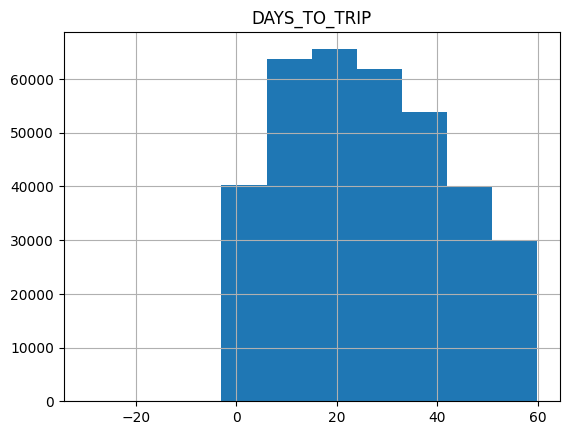

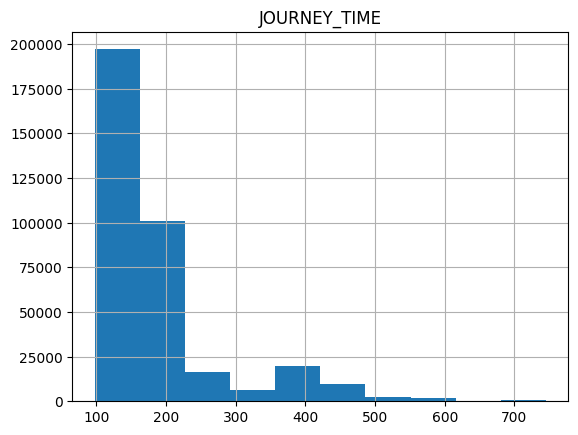

In [42]:
for i in l_num:
    renfe6.hist(i)

In [43]:
l_cat

['TIPO_TREN',
 'TIPO_TARIFA',
 'CLASE',
 'FECHA_CONSULTA_NOMBREDIA',
 'FECHA_INICIO_NOMBREDIA',
 'FECHA_FIN_NOMBREDIA',
 'TRIP']

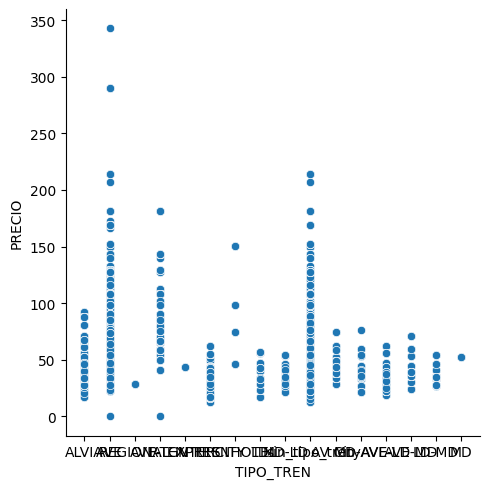

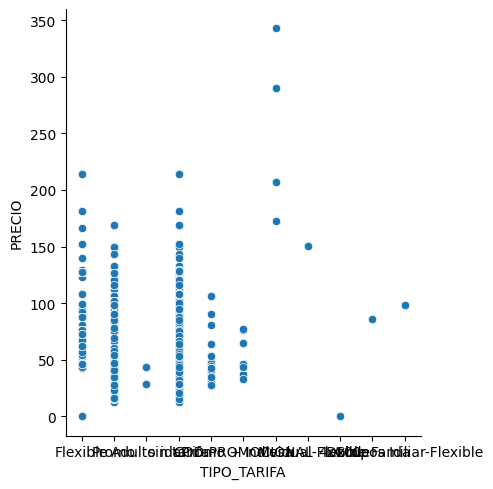

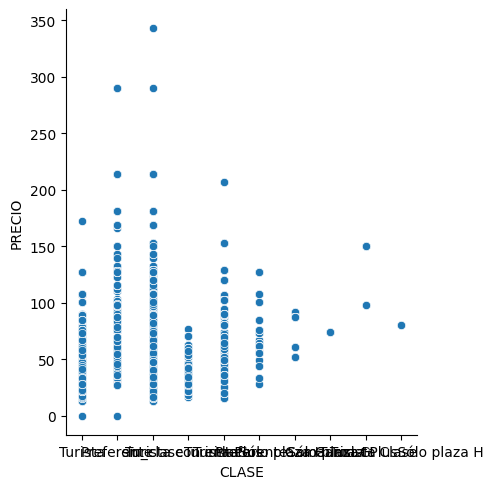

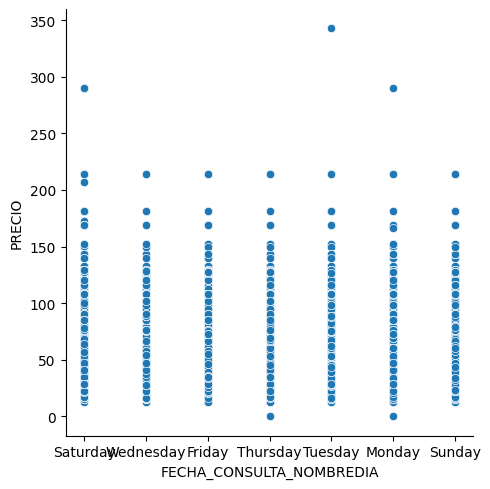

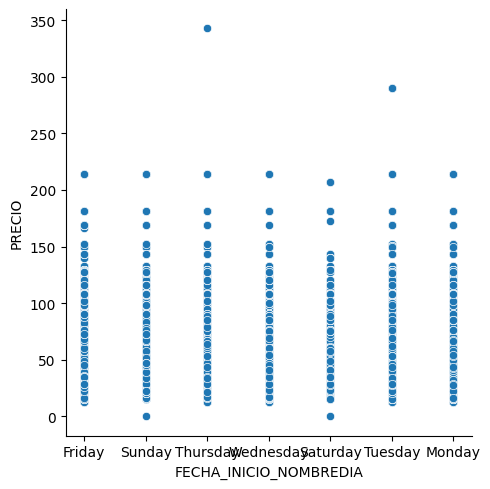

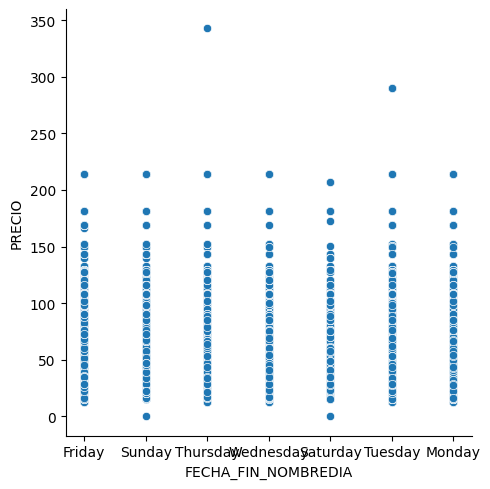

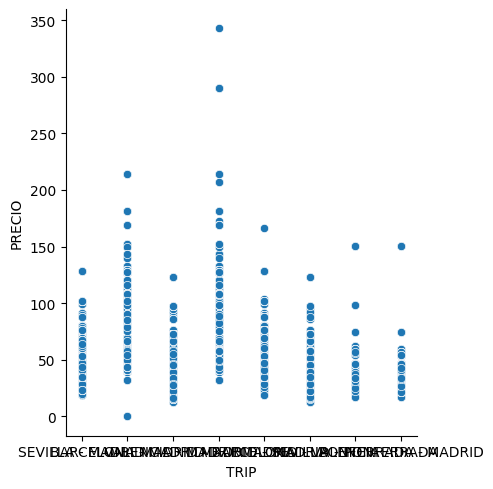

In [44]:
for i in l_cat:
    sns.relplot(data=renfe6, x=i, y="PRECIO")

In [45]:
list_to_delete2 = ['FECHA_CONSULTA_NOMBREDIA','FECHA_INICIO_NOMBREDIA', 'FECHA_FIN_NOMBREDIA']
for i in list_to_delete2:
    del(renfe6[i])

In [46]:
renfe6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355028 entries, 0 to 355027
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   TIPO_TREN     355028 non-null  object 
 1   TIPO_TARIFA   355028 non-null  object 
 2   CLASE         355028 non-null  object 
 3   PRECIO        355028 non-null  float64
 4   DAYS_TO_TRIP  355028 non-null  float64
 5   JOURNEY_TIME  355028 non-null  float64
 6   TRIP          355028 non-null  object 
dtypes: float64(3), object(4)
memory usage: 19.0+ MB


In [86]:
renfe7 = renfe6.copy()

In [87]:
modelo = renfe6['CLASE'].value_counts().reset_index()
modelo

,CLASE,count
0,Turista,243860
1,sin_clase,35554
2,Preferente,30713
3,Turista Plus,23320
4,Turista con enlace,19114
5,TuristaSólo plaza H,1951
6,PreferenteSólo plaza H,259
7,Cama Turista,240
8,Cama G. Clase,15
9,Turista PlusSólo plaza H,2


In [88]:
def get_list_minor_one_percent(dataset, column, umbral):
    list_for_delete = []
    tabla = dataset[column].value_counts().reset_index()
    for i in range(0, len(tabla)):
        if(tabla.iloc[i]['count']<umbral):
            list_for_delete.append(tabla.iloc[i,0])
    return list_for_delete
    

In [89]:
def delete_list_df(dataset, column, lista_eliminar):
    dataset.drop(dataset[dataset[column].isin(lista_eliminar)].index, inplace=True)

In [90]:
get_list_minor_one_percent(renfe7,'CLASE',400)

['PreferenteSólo plaza H',
 'Cama Turista',
 'Cama G. Clase',
 'Turista PlusSólo plaza H']

In [91]:
list_delete_clase = get_list_minor_one_percent(renfe7,'CLASE',400)

In [92]:
delete_list_df(renfe7,'CLASE', list_delete_clase)

In [93]:
renfe7['CLASE'].value_counts()

CLASE
Turista                243860
sin_clase               35554
Preferente              30713
Turista Plus            23320
Turista con enlace      19114
TuristaSólo plaza H      1951
Name: count, dtype: int64

In [94]:
renfe7['TIPO_TARIFA'].value_counts()

TIPO_TARIFA
Promo                      225900
Flexible                    64656
sin tarifa                  35406
Adulto ida                  20727
Promo +                      7669
COD.PROMOCIONAL               144
Mesa                            7
4x100                           1
Grupos Ida                      1
Doble Familiar-Flexible         1
Name: count, dtype: int64

In [95]:
list_delete_tarifa = get_list_minor_one_percent(renfe7,'TIPO_TARIFA',400)

In [96]:
delete_list_df(renfe7, 'TIPO_TARIFA', list_delete_tarifa)

In [97]:
renfe7['TIPO_TARIFA'].value_counts()

TIPO_TARIFA
Promo         225900
Flexible       64656
sin tarifa     35406
Adulto ida     20727
Promo +         7669
Name: count, dtype: int64

In [99]:
renfe7['TIPO_TREN'].value_counts()

TIPO_TREN
AVE              226574
sin_tipo_tren     35375
ALVIA             18812
REGIONAL          16591
INTERCITY         16426
AV City            9211
MD-LD              6779
AVE-TGV            4448
R. EXPRES          4131
LD                 3649
TRENHOTEL          3556
AVE-LD             2857
AVE-MD             2351
LD-MD              2346
MD-AVE              763
MD                  489
Name: count, dtype: int64

In [98]:
renfe7['TIPO_TREN'].unique()

array(['ALVIA', 'AVE', 'REGIONAL', 'AVE-TGV', 'R. EXPRES', 'INTERCITY',
       'TRENHOTEL', 'LD', 'MD-LD', 'sin_tipo_tren', 'AV City', 'MD-AVE',
       'AVE-LD', 'AVE-MD', 'LD-MD', 'MD'], dtype=object)

In [100]:
mapeo_tipos_tren = {
    'AVE': 'AVE',
    'sin_tipo_tren': 'Otros',
    'ALVIA': 'Otros',
    'REGIONAL': 'Regional',
    'INTERCITY': 'Intercity',
    'AV City': 'AVE',
    'AVE-TGV': 'AVE',
    'R. EXPRES': 'Regional Express',
    'TRENHOTEL': 'Otros',
    'MD-LD': 'Otros',
    'LD': 'Otros',
    'AVE-LD': 'AVE',
    'AVE-MD': 'AVE',
    'LD-MD': 'Otros',
    'MD': 'Otros',
    'MD-AVE': 'AVE'
}

In [101]:
renfe7['TIPO_TREN_GRUPO'] = renfe7['TIPO_TREN'].map(mapeo_tipos_tren)


In [102]:
renfe7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354358 entries, 0 to 355027
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TIPO_TREN        354358 non-null  object 
 1   TIPO_TARIFA      354358 non-null  object 
 2   CLASE            354358 non-null  object 
 3   PRECIO           354358 non-null  float64
 4   DAYS_TO_TRIP     354358 non-null  float64
 5   JOURNEY_TIME     354358 non-null  float64
 6   TRIP             354358 non-null  object 
 7   TIPO_TREN_GRUPO  354358 non-null  object 
dtypes: float64(3), object(5)
memory usage: 24.3+ MB


In [109]:
renfe7[renfe7['DAYS_TO_TRIP']<1]

,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,DAYS_TO_TRIP,JOURNEY_TIME,TRIP,TIPO_TREN_GRUPO
146,sin_tipo_tren,Adulto ida,Turista,28.35,0.95,403.0,MADRID - VALENCIA,Otros
152,AVE,Flexible,TuristaSólo plaza H,107.70,0.60,170.0,MADRID - BARCELONA,AVE
193,AVE,Promo,Turista Plus,72.30,0.62,160.0,MADRID - SEVILLA,AVE
286,AVE,Flexible,sin_clase,107.70,0.52,184.0,MADRID - BARCELONA,AVE
367,AVE,Promo,Turista,45.30,0.57,98.0,VALENCIA - MADRID,AVE
...,...,...,...,...,...,...,...,...
354752,AVE,Flexible,Turista,127.10,0.93,150.0,BARCELONA - MADRID,AVE
354864,AVE,Flexible,Turista,76.30,0.61,159.0,SEVILLA - MADRID,AVE
354901,AVE,Flexible,sin_clase,107.70,0.49,190.0,MADRID - BARCELONA,AVE
354918,AVE,Flexible,Turista,107.70,0.53,190.0,BARCELONA - MADRID,AVE


## Exporto mis variables limpias para presentarlas en Power Bi

In [104]:
file_name = "df_renfe_export.xlsx"
renfe7.to_excel(file_name)

## Now, change categorical variable by numerics

In [65]:
l_num, l_bool, l_cat = get_list_variables(renfe7)

In [82]:
renfe7['TIPO_TREN_GRUPO'].unique()

array(['Otros', 'AVE', 'Regional', 'Regional Express', 'Intercity', nan],
      dtype=object)

In [67]:
l_cat.remove('TIPO_TREN')

In [68]:
del(renfe7['TIPO_TREN'])

In [69]:
l_cat

['TIPO_TARIFA', 'CLASE', 'TRIP', 'TIPO_TREN_GRUPO']

In [70]:
renfe8 = renfe7.copy()

In [71]:
renfe8 = pd.get_dummies(data=renfe8, columns=l_cat, dtype=int)

In [72]:
renfe8.head()

,PRECIO,DAYS_TO_TRIP,JOURNEY_TIME,TIPO_TARIFA_Adulto ida,TIPO_TARIFA_Flexible,TIPO_TARIFA_Promo,TIPO_TARIFA_Promo +,TIPO_TARIFA_sin tarifa,CLASE_Preferente,CLASE_Turista,...,TRIP_MADRID - SEVILLA,TRIP_MADRID - VALENCIA,TRIP_PONFERRADA - MADRID,TRIP_SEVILLA - MADRID,TRIP_VALENCIA - MADRID,TIPO_TREN_GRUPO_AVE,TIPO_TREN_GRUPO_Intercity,TIPO_TREN_GRUPO_Otros,TIPO_TREN_GRUPO_Regional,TIPO_TREN_GRUPO_Regional Express
0,67.20,34.79,158.0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,107.70,21.87,190.0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,47.30,36.30,150.0,0,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3,28.35,18.73,460.0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,66.75,47.74,179.0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [73]:
l_num, l_bool, l_cat = get_list_variables(renfe8)

In [74]:
l_num

['DAYS_TO_TRIP', 'JOURNEY_TIME']

In [75]:
MinMax = MinMaxScaler()

In [76]:
renfe8[l_num]=MinMax.fit_transform(renfe8[l_num])

In [77]:
renfe8.head(1)

,PRECIO,DAYS_TO_TRIP,JOURNEY_TIME,TIPO_TARIFA_Adulto ida,TIPO_TARIFA_Flexible,TIPO_TARIFA_Promo,TIPO_TARIFA_Promo +,TIPO_TARIFA_sin tarifa,CLASE_Preferente,CLASE_Turista,...,TRIP_MADRID - SEVILLA,TRIP_MADRID - VALENCIA,TRIP_PONFERRADA - MADRID,TRIP_SEVILLA - MADRID,TRIP_VALENCIA - MADRID,TIPO_TREN_GRUPO_AVE,TIPO_TREN_GRUPO_Intercity,TIPO_TREN_GRUPO_Otros,TIPO_TREN_GRUPO_Regional,TIPO_TREN_GRUPO_Regional Express
0,67.2,0.721026,0.092736,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0


## Ready for Aply model